In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras 
import seaborn as sns
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD
'''
def load_data(path, flatten=False):
    images = []
    labels = []
    for subdir, dirs, files in os.walk(path):
        for filename in files:
            filepath = subdir + os.sep + filename
            label = subdir[-1]
            img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            if(flatten):
                img = img.flatten()
            images.append(img)
            labels.append(label)
            
    return np.array(images), np.array(labels)

train_images, train_labels = load_data("mnist_png/training", flatten=True)
test_images, test_labels = load_data("mnist_png/testing", flatten=True)
'''

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)
print(train_images.shape, test_images.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [2]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 5)

In [3]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation = "relu", input_shape = (28, 28, 1), padding='same'))
model.add(Conv2D(64, kernel_size=(3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))
model.summary()

optimizer = SGD(lr=0.01)
model.compile(optimizer=optimizer , loss="categorical_crossentropy", metrics=["accuracy"])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1384576   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,404,682
Trainable params: 1,404,682
Non-trainable params: 0
______________________________________________

In [4]:
history = model.fit(
        train_images, train_labels,
        batch_size=128,
        epochs = 10,
        validation_data = (val_images,val_labels)
    )

Epoch 1/10
375/375 [==============================] - 3s 8ms/step - loss: 0.8127 - accuracy: 0.7746 - val_loss: 0.3152 - val_accuracy: 0.9065
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2834 - accuracy: 0.9159 - val_loss: 0.2467 - val_accuracy: 0.9263
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2241 - accuracy: 0.9333 - val_loss: 0.2017 - val_accuracy: 0.9391
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1882 - accuracy: 0.9431 - val_loss: 0.1829 - val_accuracy: 0.9463
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1601 - accuracy: 0.9521 - val_loss: 0.1486 - val_accuracy: 0.9562
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1391 - accuracy: 0.9583 - val_loss: 0.1347 - val_accuracy: 0.9587
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1267 - accuracy: 0.9618 - val_loss: 0.1464 - val_accuracy: 0.9551
Epoch 

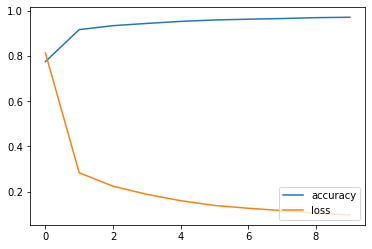

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.legend(loc='lower right')

In [6]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0926862359046936
Test accuracy: 0.97079998254776
